In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

med_df = pd.read_csv('full_health_medicals.csv.csv')
print med_df.head()

  gender  birth_date  age_at_medical  systolic_value  diastolic_value  \
0   male    3/2/1971              45             130               88   
1   male   9/13/1981              35             110               70   
2   male  12/27/1976              40             130               88   
3   male  10/12/1975              41             129              100   
4   male   7/20/1970              46             118               78   

   bmi_value  qrisk2_score healthy_qrisk2_score  relative_risk_score  \
0       22.5      6.126438             2.383897             2.569926   
1       24.8      0.493301             0.622588             0.792339   
2       30.4      2.398695             1.303095             1.840768   
3       33.8      3.385506             1.483843             2.281580   
4       28.0      2.674966             2.657748             1.006478   

   heart_age       ...       flu_received_already flu_feeling_unwell  \
0       55.0       ...                        NaN       

In [46]:
print "Mean Age:"
print np.mean(med_df['age_at_medical'])

Mean Age:
43.5870646766


In [47]:
def heart_age_diff(df):
    return np.mean(df['age_at_medical'] - df['heart_age'])

def age_diff(df):
    return df['age_at_medical'] - df['heart_age']

## Checking average difference between actual age and heart age for various groups

In [48]:
smokers = med_df[med_df['smoker'] == 'Yes']
non_smokers = med_df[med_df['smoker'] == 'No']
above_average_bmi = med_df[med_df['bmi_value'] > np.mean(med_df['bmi_value'])]
red_cholestrol = med_df[med_df['Cholesterol'] == 'red']
red_bp = med_df[med_df['Blood Pressure'] == 'red']

metrics = dict(Smokers=heart_age_diff(smokers), Non_Smokers=heart_age_diff(non_smokers), Above_Average_BMI=heart_age_diff(above_average_bmi), Choletsrol=heart_age_diff(red_cholestrol), Blood_Pressure=heart_age_diff(red_bp))
pd.DataFrame(metrics.items()).T

,0,1,2,3,4
0,Blood_Pressure,Choletsrol,Non_Smokers,Smokers,Above_Average_BMI
1,-8.3,-6.5,-2.2957,-5.18182,-5.01176


In [1]:
plt.hist((age_diff(smokers),age_diff(non_smokers),age_diff(above_average_bmi),age_diff(red_cholestrol),age_diff(red_bp)), range=(-20,10))
plt.legend(labels=metrics.keys())
plt.show()

NameError: name 'plt' is not defined

12.24388534


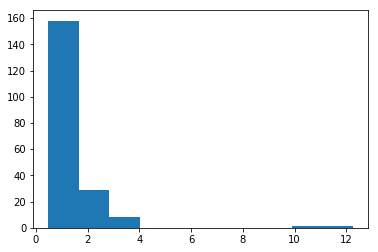

In [50]:
risk_score = med_df['relative_risk_score']
print risk_score.max()
plt.hist(risk_score, range=(risk_score.min(), risk_score.max()))
plt.show()

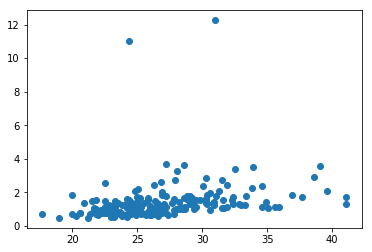

In [61]:
plt.scatter(med_df['bmi_value'], med_df['relative_risk_score'])
plt.show()